# Exploratory data analysis

In this notebook we will explore and visualize trends, patterns and distributions in the cleaned OMDb dataset.

* more to be there *

## 1. Setup and Data Overview


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# now point to the cleaned CSV
data_path = os.path.join(
    project_root,
    "data_collection",
    "omdb_cleaned.csv"
)

print("Reading from:", data_path)
df = pd.read_csv(data_path)
df.info()

Reading from: c:\PythonProjects\Movie-Team\data_collection\omdb_cleaned.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4764 entries, 0 to 4763
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       4764 non-null   object 
 1   imdbID      4764 non-null   object 
 2   Year        4764 non-null   object 
 3   Genre       4757 non-null   object 
 4   Director    4638 non-null   object 
 5   Actors      4719 non-null   object 
 6   Language    4718 non-null   object 
 7   Country     4754 non-null   object 
 8   Runtime     4706 non-null   object 
 9   BoxOffice   2845 non-null   float64
 10  imdbRating  4706 non-null   float64
 11  imdbVotes   4722 non-null   float64
 12  Awards      3579 non-null   object 
 13  Type        4764 non-null   object 
dtypes: float64(3), object(11)
memory usage: 521.2+ KB


feauture description + types

## 2. Missing Values

text

### 2.1 Missing values heatmap

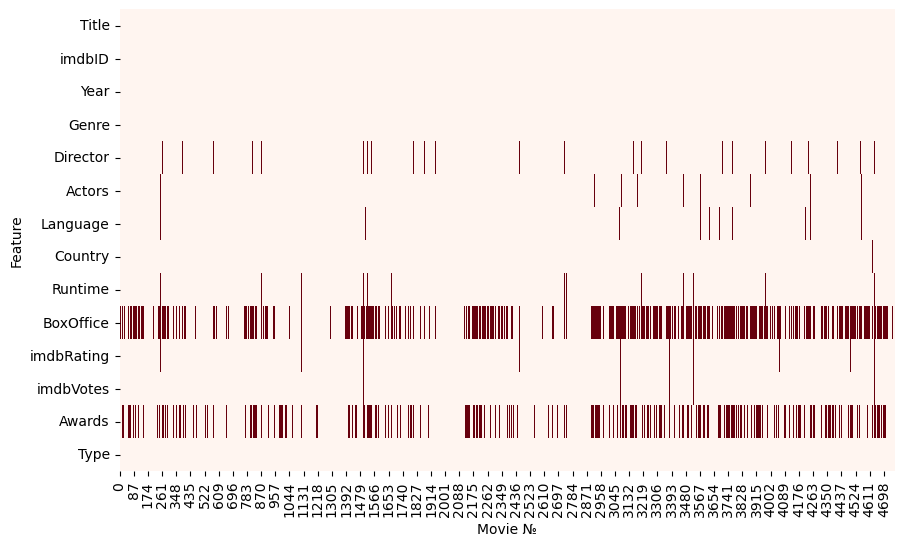

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().T, cbar=False, cmap="Reds", yticklabels=True)

plt.xlabel("Movie №")
plt.ylabel("Feature")
plt.show()

### 2.2 Missing values table

In [6]:
missing_summary = df.isna().sum().reset_index()
missing_summary.columns = ['Feature', 'Missing Count']
missing_summary["% Missing"] = (missing_summary["Missing Count"] / len(df)) * 100
missing_summary = missing_summary[missing_summary["Missing Count"] > 0]
missing_summary.sort_values(by="Missing Count", ascending=False)

,Feature,Missing Count,% Missing
9,BoxOffice,1919,40.281276
12,Awards,1185,24.874055
4,Director,126,2.644836
8,Runtime,58,1.217464
10,imdbRating,58,1.217464
6,Language,46,0.965575
5,Actors,45,0.944584
11,imdbVotes,42,0.881612
7,Country,10,0.209908
3,Genre,7,0.146935


### 2.3 The Boxplot: IMDb rating vs missing box of

Here we want to briefly find out whether the absence of box office data is related to movie popularity. We compared IMDb ratings for movies with and without BoxOffice values.

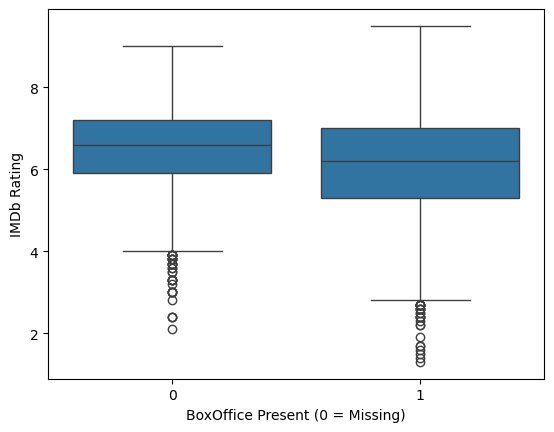

In [7]:
df["missing_boxoffice"] = df["BoxOffice"].isna().astype(int)

sns.boxplot(x="missing_boxoffice", y="imdbRating", data=df)
plt.xlabel("BoxOffice Present (0 = Missing)")
plt.ylabel("IMDb Rating")
plt.show()

There is no significant difference between the two groups which suggests that missing Box Office fields are not strongly biased by rating.

## 3. Feature Exploration





### 3.1 Ratings & Votes

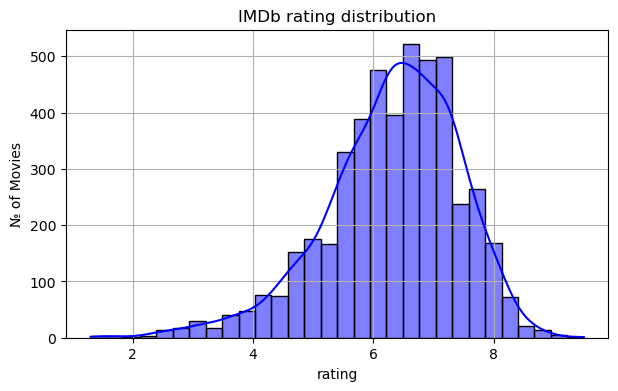

In [8]:
plt.figure(figsize=(7, 4))
sns.histplot(df["imdbRating"].dropna(), bins=30, kde=True, color="blue")
plt.title("IMDb rating distribution")
plt.xlabel("rating")
plt.ylabel("№ of Movies")
plt.grid(True)
plt.show()

### 3.2 Runtime Distribution

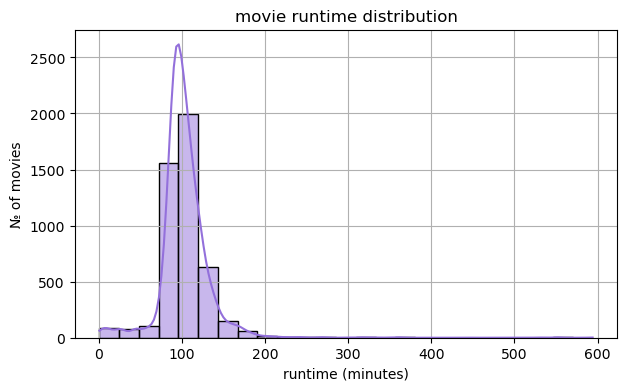

In [9]:
#convert string "runtime" to float type
df["Runtime_clean"] = df["Runtime"].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(7, 4))
sns.histplot(df["Runtime_clean"].dropna(), bins=25, kde=True, color="mediumpurple")
plt.title("movie runtime distribution")
plt.xlabel("runtime (minutes)")
plt.ylabel("№ of movies")
plt.grid(True)
plt.show()

### 3.3 Genre Frequency

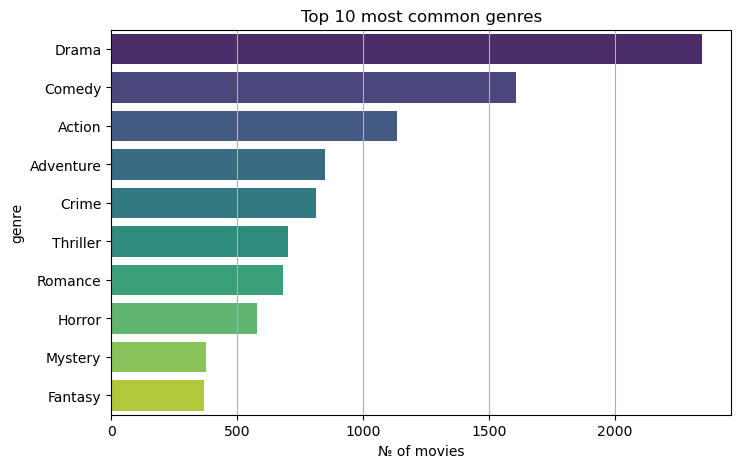

In [10]:
# to count how often each genre appears in the list
from collections import Counter

all_genres = []

for genre_string in df["Genre"].dropna():
    split_genres = genre_string.split(", ")
    all_genres.extend(split_genres)

from collections import Counter
genre_counts = pd.DataFrame(Counter(all_genres).most_common(10), columns=["Genre", "Count"])

plt.figure(figsize=(8, 5))
sns.barplot(data=genre_counts, y="Genre", x="Count", hue="Genre", palette="viridis", dodge=False, legend=False)
plt.title("Top 10 most common genres")
plt.xlabel("№ of movies")
plt.ylabel("genre")
plt.grid(True, axis='x')
plt.show()

### 3.4 Country / Language

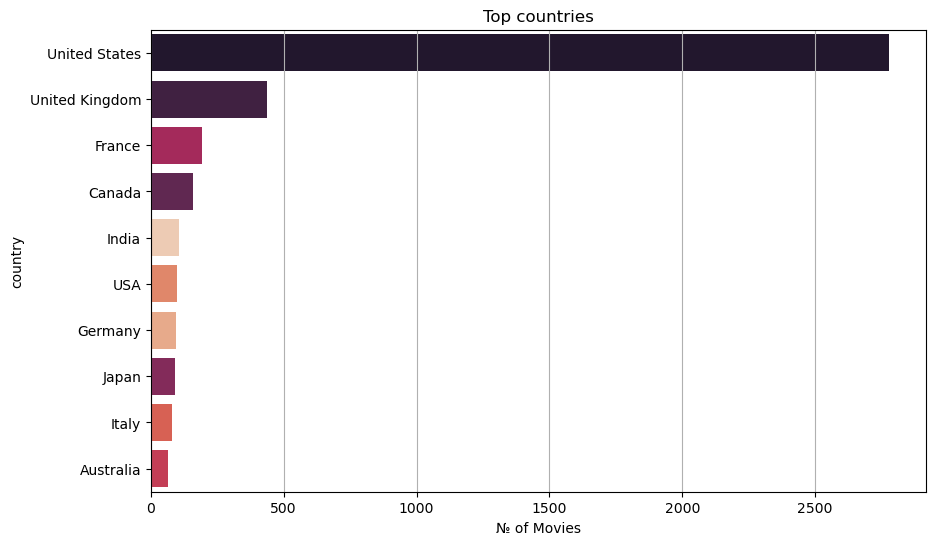

In [11]:
df["Main_Country"] = df["Country"].dropna().apply(lambda x: x.split(",")[0])

plt.figure(figsize=(10, 6))
order = df["Main_Country"].value_counts().head(10).index

sns.countplot(
    data=df[df["Main_Country"].isin(order)],
    y="Main_Country",
    order=order,
    hue="Main_Country",        
    palette="rocket",
    dodge=False,
    legend=False            
)

plt.title("Top сountries")
plt.xlabel("№ of Movies")
plt.ylabel("сountry")
plt.grid(True, axis='x')
plt.show()

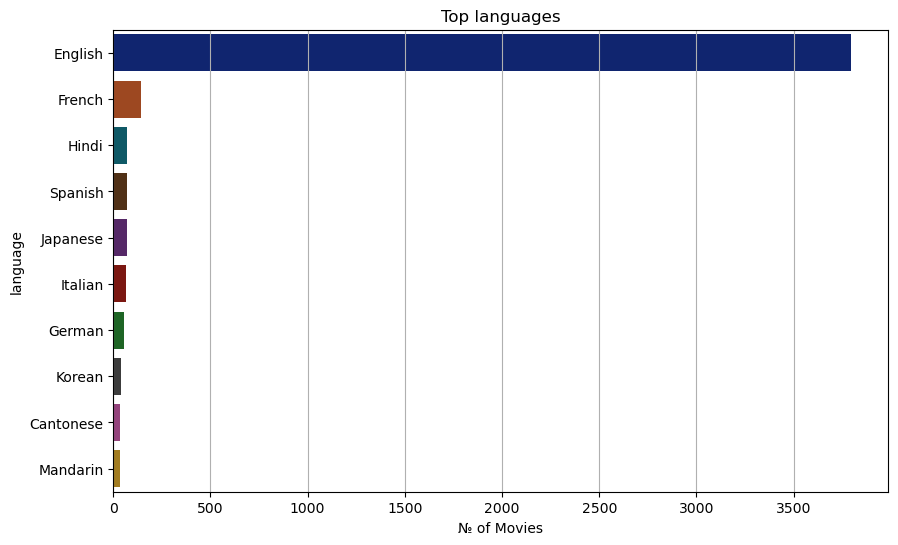

In [12]:
df["Main_Language"] = df["Language"].dropna().apply(lambda x: x.split(",")[0])

# top 10 most frequent
top_languages = df["Main_Language"].value_counts().head(10).index

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df[df["Main_Language"].isin(top_languages)],
    y="Main_Language",
    order=top_languages,
    hue="Main_Language",        
    palette="dark",         
    dodge=False,
    legend=False
)

plt.title("Top languages")
plt.xlabel("№ of Movies")
plt.ylabel("language")
plt.grid(True, axis='x')
plt.show()

## 4. sxss

## 5. sxss

## 6. sxss

## 7. sxss